# Part 1: Binning degree distributions

## Binning real numbers

**Let's do a gentle start and use the random library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.**

In [1]:
import matplotlib.pyplot as plt, numpy as np, random, networkx as nx
%matplotlib inline

In [2]:
mu=2
sigma=0.125
N=5000
data=[random.gauss(mu,sigma) for i in range(N)]

**Now, let's use numpy.histogram to bin those number into 10 bins. What does the numpy.histogram function return? Do the two arrays have the same length?**

In [3]:
count,bin_edges=np.histogram(data,bins=10)
print(len(count))
print(len(bin_edges))

10
11


The function returns two arrays. One which contains the number of observations in each bin, and one which contains the edges of the bins. This is also the reason why the two arrays are not the same length. The count is including observations with an value equal to the left bin value, but not the right. The last bin is the exception, where both bin values are included in the count. (https://numpy.org/doc/stable/reference/generated/numpy.histogram.html 13.9.2020)

**Then we use matplotlib.pyplot.plot to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.**

To deal with the problem, two arrays a defined. For each bin the edge values are added to X, and the count value for the corresponding bin is added to the corresponding positions in Y. This solution results in the data points X,Y defining the edges of the histogram.

In [4]:
X=[]
Y=[]

for i in range(10
              ):
    X.extend([bin_edges[i],bin_edges[i+1]])
    Y.extend([count[i],count[i]])  
    
print("Length of:")    
print("X: {}".format(len(X)))
print("Y: {}".format(len(Y)))

Length of:
X: 20
Y: 20


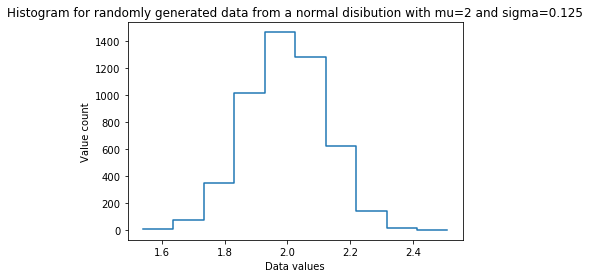

In [6]:
plt.plot(X,Y)
plt.title("Histogram for randomly generated data from a normal disibution with mu=2 and sigma=0.125")
plt.ylabel("Value count")
plt.xlabel("Data values")
plt.show()

## Binning integers

**But binning real numbers into a fixed number of bins is easy when numpy.histogram does all the work and finds the right bin boundaries for you. Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out numpy also has some convenient random number generators. Use numpy.random.poisson to generate 5000 numbers drawn from a Poisson distribution characterized by λ=10. Find the maximum and minimum value of your 5000 random numbers.**

In [8]:
# Generating data from Poisson distribution
Lambda=10
N=5000
data_int=np.random.poisson(Lambda,N)

# Finding min and max
data_min=data_int.min()
data_max=data_int.max()
print("Min: {}".format(data_min))
print("Max: {}".format(data_max))

Min: 1
Max: 23


**Instead of simplify specifying the number of bins for numpy.histogram, let's specify the bins we want using a vector. Create a vector v that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number. Use the vector by setting numpy.histogram's bin parameter as bin = v. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.**

In [9]:
# Creating a bin vector
v=[]
for i in range(data_min,data_max+1):
    v.append(i) 
    
v.append(data_max+1)

In [10]:
# Count observations in each bin
count_int,bin_edges_int=np.histogram(data_int,bins=v)

As expected the sum over the bin counts is 5000.

In [12]:
print("Sum over bin count: {}".format(sum(count_int)))

Sum over bin count: 5000


Since the min from the Poisson distribution is the lowest value of data to be binned, it is also equal to the first value of the binning vector. However max corresponds to the second last value of the binning vector, as the last value of the binning vector is included in the last bin. This mean that was max instead to be the last value in the binning vector, then the last bin would contain both values corresponding to max and max-1.

**Now, use a bar chart (matplotlib.pyplot.bar) to plot the distribution**

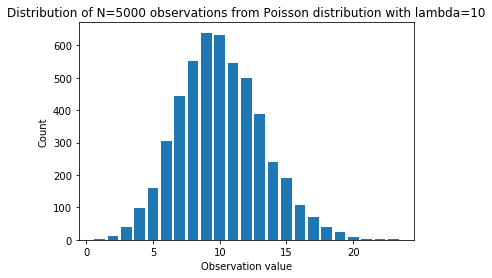

In [15]:
plt.bar(v[:-1],count_int)
plt.title("Distribution of N=5000 observations from Poisson distribution with lambda=10")
plt.ylabel('Count')
plt.xlabel('Observation value')
plt.show()

## Binning and plotting degree distributions.


**Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. First we have to figure out which values the ER parameters (N and p) should assume. It's easy to see that $N = 5000$, but how do you find $p$? Hint: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.**

In [16]:
N=5000
k=10
# p is calculated from the equation k=p(N-1)
p=k/(N-1)
print("p = {}".format(p))

p = 0.002000400080016003


**Now, use networkx to create the graph and extract the degree distribution.**

In [17]:
#The code is based on the following example:
# https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_degree_histogram.html (14.9.2020)

import collections
ER=nx.erdos_renyi_graph(N,p)


degrees=sorted([d for n, d in ER.degree()], reverse=True) # The degree for each node is stored in a sorted list

# How many nodes with each degree the network contains is stored in a dictionary
degree_count= collections.Counter(degrees) 
degree, count = zip(*degree_count.items())

**Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.**

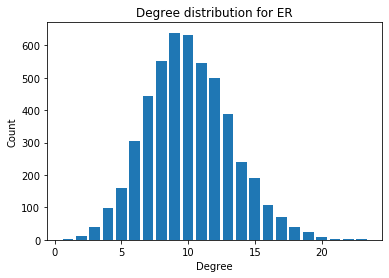

In [18]:
plt.bar(v[:-1],count_int)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree distribution for ER')
plt.show()

It can be observed that the degree distribution does match the Poisson distribution.

# Part 2: Random networks and plotting in networkx

**In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.**

" *Consider an Erdős-Rényi network with N = 3,000 nodes, connected to each other with probability $p = 10^{–3}$*" (Barabási, Albert-Lászlo, Network Science, http://networksciencebook.com/section, 27.9.2020, section 3.11)

- **What is the expected number of links, 〈L〉**

In [20]:
N=3000
p=10**(-3)

avg_links=(p*N*(N-1)/2)
print("〈L〉={}".format(avg_links))

〈L〉=4498.5


- **In which regime is the network?**

To determine which regime the network belongs to, the average degree 〈k〉 is calculated, as well as ln(N)

In [22]:
avg_degree=p*(N-1)
print("〈k〉={}".format(avg_degree))
print("ln(N)={}".format(np.log(N)))

<k>=2.999
ln(N)=8.006367567650246


Since $〈k〉 > 1$ and $〈k〉\leq ln(N)$, the network is in the supercritical regime(Barabási, Albert-Lászlo, Network Science, http://networksciencebook.com/section, 27.9.2020, section 3.6).

**Calculate the probability $p_c$ so that the network is at the critical point.**

Equation 3.11 (Barabási,Albert-László, Network science, http://networksciencebook.com/section, 27.9.2020) states that for a network at the critiacal point  $p_c=\frac{1}{(N-1)}$.

In [24]:
p_c=1/(N-1)
print("p_c={}".format(p_c))

p_c=0.00033344448149383126


The new 〈𝑘〉 is then calculated based on the new $p_c$.

In [25]:
avg_k_c=p_c*(N-1)
print("For p_c, ‹k›= {}".format(avg_k_c))

For p_c, ‹k›= 0.9999999999999999


For the network to be at the critical point ‹k›=1 (Barabási,Albert-László, Network science, section 3.6). Except for rounding, we observe that this is the case, as:

$〈𝑘〉=p_c\cdot(N-1)=\frac{1}{(n-1)}\cdot(N-1)=1$



- **Given the linking probability $p =  10^{–3}$ , calculate the number of nodes  $𝑁^{𝑐𝑟}$  so that the network has only one component.**

To fullfil this criteria $N^{cr}$ must result in the network beloning to the connected regime. From the definition this mean that we are looking for an N for which $p>\frac{ln(N)}{N}$. To determine for which value of N this is true the development of $\frac{ln(N)}{N}$ is plotted as a function of N.

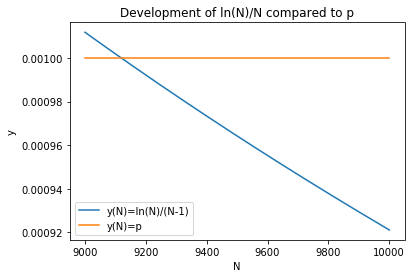

In [29]:
N_possible=np.arange(9000,10001)
fractionN=np.log(N_possible)/(N_possible-1)

plt.plot(N_possible,fractionN)
plt.plot(N_possible,[p for i in N_possible])
plt.title("Development of ln(N)/N compared to p")
plt.ylabel("y")
plt.xlabel("N")
plt.legend(["y(N)=ln(N)/(N-1)","y(N)=p"])
plt.show()

In [30]:
N_possible[np.where(fractionN<p)[0].min()]

9120

From the above plot we see that for $N\geq9120$, $\frac{ln(N)}{(N-1)}$ is smaller than $p$. This mean that for all N values fullfilling this condition the network belongs to the connected regime, and only have one component. 

$N^{cr}=9120$

Below we test that the condition for the connected regime holdes for $N^{cr}$

In [34]:
N_cr=9120
print(p>np.log(N_cr)/(N_cr-1))

True


- **For the network in (d), calculate the average degree $〈k^{cr}〉$ and the average distance between two randomly chosen nodes $〈d〉$.** 

Based on the previouse question, it is assumed that $p^{cr}=p=10^{-3}$.

In [38]:
#Calculating the avg. degree
avg_k_cr=p*(N_cr-1)
print("〈𝑘^𝑐𝑟〉: {}".format(avg_k_cr))

#calculating the avg. distance
avg_d_cr=np.log(N_cr)/np.log(avg_k_cr)
print("〈d〉={}".format(avg_d_cr))

〈𝑘^𝑐𝑟〉: 9.119
〈d〉=4.12522144293705


- **Calculate the degree distribution  $𝑝_𝑘$  of this network (approximate with a Poisson degree distribution).**

The poisson approximation has the following form (Barabási,Albert-László, Network science, equation 3.8):

$p_k=e^{-<k>}\cdot \frac{<k>^k}{k!}$       

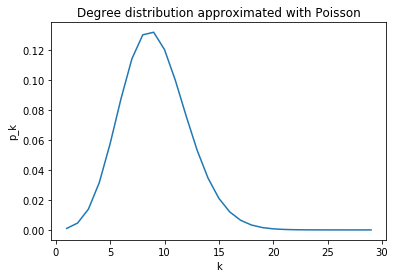

In [39]:
import math

degrees=np.arange(1,30)
degree_disribution=[np.exp(-avg_k_cr)*avg_k_cr**k/math.factorial(k) for k in degrees]
plt.plot(degrees,degree_disribution)
plt.ylabel("p_k")
plt.xlabel("k")
plt.title("Degree distribution approximated with Poisson")
plt.show()

As expected the approximated destibution shown above, is centered around 9.119 corresponding to $〈𝑘^{𝑐𝑟}〉$.

**Paths. Plot a random network with 200 nodes and an average degree of 1.5. (I suggest using networkx.draw and reading the documentation carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).**

In [40]:
N=200
avg_k=1.5
p=avg_k/(N-1)

#Generating the random network, which will be called G
G=nx.erdos_renyi_graph(N,p)

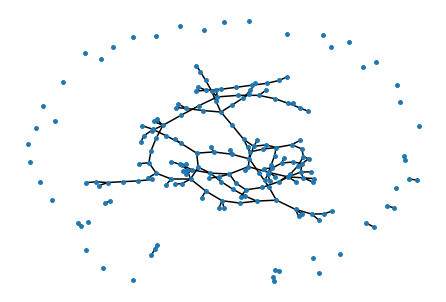

In [47]:
nx.draw(G,node_size=15,width=1.5)

- **Extract the Giant Connected Component, GCC. (Hint. You can use networkx.connected_component_subgraphs)**

In [48]:
Connected_components=list(nx.connected_components(G))

#Find the largest connected component, to get the GCC.
GCC=G.subgraph(max(Connected_components,key=len)).copy()

- **Choose a node at random from the GCC. (Hint: You may want to try random.choice.)**

In [51]:
random_node=np.random.choice(GCC)
print("Random node choosen: {}".format(random_node))

Random node choosen: 85


- **Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest networkx.single_source_shortest_path_length)**

In [53]:
nodes_max_2steps=nx.single_source_shortest_path_length(GCC,random_node,2)
nodes_2steps=[]
print("The following nodes are 2 steps away from the node:")
for i in nodes_max_2steps:
    if nodes_max_2steps[i]==2:
        print("- node {}".format(i))
        nodes_2steps.append(i)

The following nodes are 2 steps away from the node:
- node 152
- node 36
- node 103


- **Plot the GCC with the following choice of colors. Starting node black ("#000000"). The nodes 2 steps away red ("#ff0000"). All other nodes blue ("#A0CBE2"). Again, I suggest using networkx.draw() and reading the documentation carefully find out how to color individual nodes.**

To create the plot each nodes in GCC is assigned a type, describing if it is a start node, 2 steps away or other.

In [54]:
#each node is then assigned an attribute descirbing their type
for node in GCC.nodes():
    if node==random_node:
        GCC.nodes()[node]['type']='start'
    elif node in nodes_max_2steps:
        GCC.nodes()[node]['type']='2_step'
    else:
        GCC.nodes()[node]['type']='other'


A color map is then creating, mapping the node type, to the color.

In [55]:
color_map={'start':"#000000",'2_step':"#ff0000",'other':'#A0CBE2'}

The network can now be illustrated.

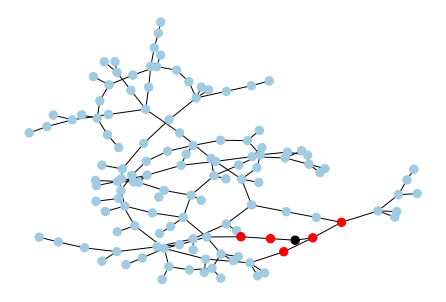

In [56]:
nx.draw(GCC,node_size=70,node_color=[color_map[t] for t in [GCC.nodes()[node]['type'] for node in GCC]])

# Part 3: Watts-Strogatz Networks

- **Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.**

In [57]:
#Creating the three Watts-Stogatz networks
WS_p0=nx.watts_strogatz_graph(500,4,0)
WS_p01=nx.watts_strogatz_graph(500,4,0.1)
WS_p1=nx.watts_strogatz_graph(500,4,1)

In [58]:
# Calculated the avg. shortest path length.
print("Average shortest path lenght (<d>)")
print("")
avg_d_WS_p0=nx.average_shortest_path_length(WS_p0)
print("WS with p=0: {}".format(avg_d_WS_p0))
avg_d_WS_p01=nx.average_shortest_path_length(WS_p01)
print("WS with p=0.1: {}".format(avg_d_WS_p01))
avg_d_WS_p1=nx.average_shortest_path_length(WS_p1)
print("WS with p=1: {}".format(avg_d_WS_p1))

Average shortest path lenght (<d>)

WS with p=0: 62.875751503006015
WS with p=0.1: 7.528937875751503
WS with p=1: 4.7577715430861724


It is observed that as p increses,  ⟨𝑑⟩  decreses. When p=1 the network has become a random network (Barabási,Albert-László, Network science, Box 3.9), where the low  ⟨𝑑⟩ captures the small world property. The average shortest path for a random network with the same N and ⟨k⟩ is shown below, and are comparable to the value obtained for the Watts-Strogatz network with p=1.

In [60]:
# average shortes distances in random networks.
print("⟨𝑑⟩ for random network with N=500 and ⟨k⟩=4")
print(np.log(500)/np.log(4))

⟨𝑑⟩ for random network with N=500 and ⟨k⟩=4
4.4828921423310435


- **Let's understand the behavior of the WS model as we increase p in more detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).**

In [61]:
# Generating 50 networks for each value of p.
networks=[]
P=np.sort([0,0.01,0.03,0.05,0.1,0.2])

for p in P:
    networks.append([nx.watts_strogatz_graph(500,4,p) for i in range(50)])  

In [62]:
# Calculaing ⟨d⟩ for all networks
networks_d=[]

for n in range(len(networks)):
    networks_d.append([nx.average_shortest_path_length(i) for i in networks[n]])

In [63]:
# Caluclating average ⟨d⟩ for each value of p
networks_avg_d=[]

for n in range(len(networks)):
    networks_avg_d.append(np.mean(networks_d[n]))

In [64]:
# Calculating the standard deviation
networks_std_d=[]

for n in range(len(networks)):
    networks_std_d.append(np.std(networks_d[n]))

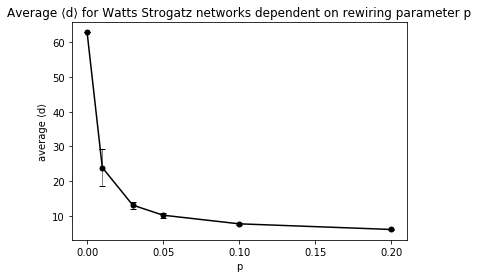

In [65]:
plt.errorbar(P,networks_avg_d,networks_std_d,marker='o',markersize=5,capsize=3,elinewidth=0.5,color='k')
plt.xlabel("p")
plt.ylabel("average ⟨d⟩")
plt.xticks([0,0.05,0.1,0.15,0.2])
plt.title("Average ⟨d⟩ for Watts Strogatz networks dependent on rewiring parameter p")
plt.show()

As expected the above plot shows that average shortest parth decreaes when the value of p increases. Furthermore it shows that especcially for values of p around 0, even small changes can have a large effect on ⟨𝑑⟩.

# Part 4. The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in right in a notebook. Follow the recipe below for success

**Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.**

In [81]:
from functools import reduce
import operator
import pandas as pd

In [96]:
# initializing the network
G=nx.Graph([(1,2)])

# adding additional nodes
for ii in range(3,101):
    all_nodelinks = reduce(operator.concat, G.edges)
    rand_item = random.choice(all_nodelinks)
    G.add_edge(ii ,rand_item)

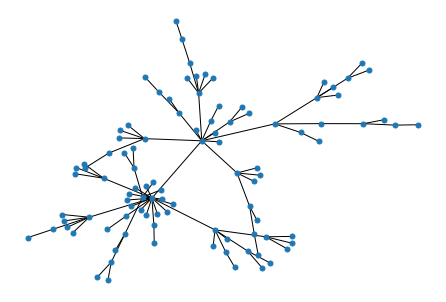

In [97]:
nx.draw(G,node_size=25)

As expected we see that a few of the nodes have many links, while the majority only have few links.

**Now create a 5000 node network.**

In [99]:
# initializing the network
G2=nx.Graph([(1,2)])

# adding additional nodes
for ii in range(3,5001):
    all_nodelinks = reduce(operator.concat, G2.edges)
    rand_item = random.choice(all_nodelinks)
    G2.add_edge(ii ,rand_item)

- **What's the maximum and minimum degree?**

In [110]:
degree=np.array([d for n, d in G2.degree()])

max_degree=np.max(degree_list)
min_degree=np.min(degree_list)

print("Max degree:{}".format(max_degree))
print("Min degree:{}".format(min_degree))

Max degree:190
Min degree:1


- **Now, bin the degree distribution, for example using numpy.histogram.**

In [133]:
degree_count,bins=np.histogram(degree,bins=np.arange(min_degree,max_degree+2))

- **Plot the distribution. Plot it with both linear and log-log axes.**

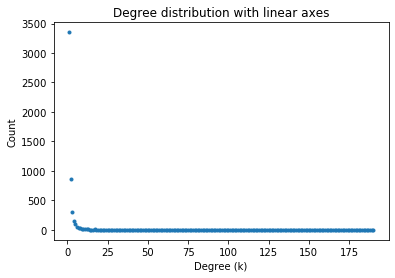

In [134]:
plt.plot(np.arange(min_degree, max_degree+1),degree_count,'o',markersize=3)
plt.xlabel("Degree (k)")
plt.ylabel("Count")
plt.title("Degree distribution with linear axes")
plt.show()

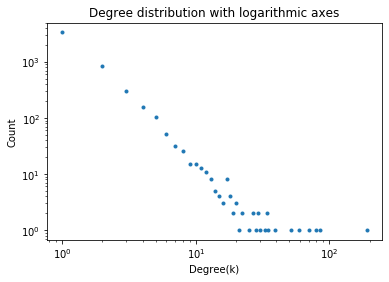

In [136]:
plt.plot(np.arange(min_degree,max_degree+1),degree_count,'o',markersize=3)
plt.xlabel("Degree(k)")
plt.xscale("log")
plt.ylabel("Count")
plt.yscale("log")
plt.title("Degree distribution with logarithmic axes")
plt.show()

The degree distributions shown above confirms the power-law behavior as expected for Barabasi-Albert networks.

# Part 5 Power-laws and the friendship paradox

**Next step is to explore the Friendship paradox. This paradox states that almost everyone have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:**

- **Pick a node i at random (e.g. use random.choice). Find its degree.**

In [161]:
randomnode=random.choice(list(G2.nodes()))
i_degree=G2.degree(randomnode)
print("Node {} has been picked, and has a degree of {}.".format(randomnode,i_degree))

Node 1336 has been picked, and has a degree of 1.


- **Find i's neighbors. And calculate their average degree.**

In [162]:
neighbors=list(G2.adj[randomnode])
neighbors_degree_list=list(G2.degree[i] for i in neighbors)
avg_degree_neighbors=np.mean(neighbors_degree_list)
print("Average degree of i's neighbors:",avg_degree_neighbors)

Average degree of i's neighbors: 2.0


- **Compare the two numbers to check if it's true that i's friends (on average) have more friends than i.**

In [164]:
if avg_degree_neighbors>i_degree:
    print("It is true that i's friends on average have more friends than i, which is in line with the Friendship paradox")
else:
    print("It is not true that i's friends on average have more friends than i, which is not in line with the Friendship paradox")

It is true that i's friends on average have more friends than i, which is in line with the Friendship paradox


- **Do this 1000 times. How many out of those 1000 times is the friendship paradox true?**

In [165]:
true_count=0
for ii in range(1000):
    randomnode=random.choice(list(G2.nodes()))
    neighbors=list(G2.adj[randomnode])
    neighbors_degree_list=list(G2.degree[i] for i in neighbors)
    if np.mean(neighbors_degree_list)>G2.degree[randomnode]:
        true_count+=1

print("The friendship paradox was true {} times out of 1000".format(true_count))

The friendship paradox was true 857 times out of 1000


**Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment.**

This corresponds to an Erdos Renyi network. To build it we therefore need to know N and p. Since the network should bethe same size we already know N=5000. However p is not known and must first be calculated. To do this the following equation is used (chapter 3, equation 3.3)

$⟨k⟩=p(N−1) $

From the equation we can see that we need to know the average degree ⟨k⟩, in order to determine p.

In [177]:
N=5000

avg_k=np.mean(degree)
print("⟨𝑘⟩ = {}".format(avg_k))

⟨𝑘⟩ = 1.9996


We can now calculate p



In [179]:
p=avg_k/(N-1)
print("p = {}".format(p))

p = 0.0004


The network can now be created.

In [180]:
ER=nx.erdos_renyi_graph(N,p)

- **Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. Hint: To get started, take a look at the degree distribution, and study the number of connected components.**

To show the differences we start by taking a look at the degree distrubution for the new ER network.

In [196]:
degree_list_ER=[d for n, d in ER.degree()]

min_degree_ER=np.min(degree_list_ER)
max_degree_ER=np.max(degree_list_ER)

degree_count_ER,bins_ER=np.histogram(degree_list_ER,bins=np.arange(min_degree_ER,max_degree_ER+2))

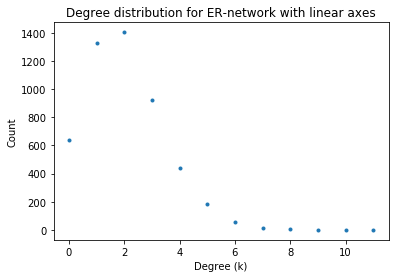

In [197]:
plt.plot(np.arange(min_degree_ER,max_degree_ER+1),degree_count_ER,'o',markersize=3)
plt.xlabel("Degree (k)")
plt.ylabel("Count")
plt.title("Degree distribution for ER-network with linear axes")
plt.show()

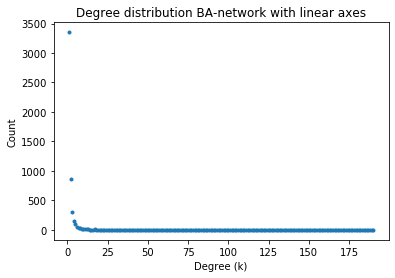

In [189]:
plt.plot(np.arange(min_degree, max_degree+1),degree_count,'o',markersize=3)
plt.xlabel("Degree (k)")
plt.ylabel("Count")
plt.title("Degree distribution BA-network with linear axes")
plt.show()

The degree distribution for the ER network, appear to be following a binomial distribution, as would be expected (chapter 3.4). This is in contrast to the degree distribution of the BA network, which appeared to be follow a power-law (chapter 5.5). This difference can be understood in light of the presence of preferential attachmen in the BA network. Here the nodes are more likely to connect to the most connected nodes, which results in a distribution where most nodes have only very few connections, while a few nodes have a high number of connections. Without the preferential attachment nodes are equally likely to connect to any node. This mean that the degree distribution centers around ⟨𝑘⟩, but also that the highest observed degree becomes much lower which is what can be observed for the ER network.

In [191]:
print("Number of connected components in BA: {}".format(nx.number_connected_components(G2)))
print("Number of connected components in ER: {}".format(nx.number_connected_components(ER)))

Number of connected components in BA: 1
Number of connected components in ER: 766


Observing the number of connected components in the BA network, it is not surprising that there is only one connected component, as the network was initialized with two connected nodes, and all nodes added later had one connection. However this development can be understood in contrast to the ER network where nodes are not required to be connected, allowing for serveral connected components. Furthermore the lack of preferiental attachment in the ER network drives up the number of connected components, since a preference for connecting to well-connected nodes would have increased the probability of creating links between the different connected components.